# Marketing and Sales Data

### Simple Linear Regression

1. There is only one predictor.

### Conditions for Linear Regression

1. Predictor and the target variables should strong correlation.
2. There should be a linear relationship between them.


## Marketing Dataset

In [ ]:
#source : # https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data?resource=download

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")
# from pandas import Series,DataFrame

In [ ]:
rcParams['figure.figsize'] = 10,6

In [ ]:
df_sales = pd.read_csv('Marketing 2.0.csv')
df_sales.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


Check the colums

change the name of variable.

In [ ]:
df_sales.rename(columns={'Social Media':'Social_Media'},inplace=True)

In [ ]:
df_sales.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [ ]:
cols =df_sales.columns
cols

Index(['TV', 'Radio', 'Social_Media', 'Sales'], dtype='object')

We like to create subplots between Independent variable and Dependent variable(Sales).So lets create a scatter plots where the list has only dependent variable.

In [ ]:
cols=list(df_sales.drop('Sales',axis=1).columns)

In [ ]:
cols

['TV', 'Radio', 'Social_Media']

1. Loop through each column name from the list. So that we create scatter plot for Independent and Dependent variable.
2.

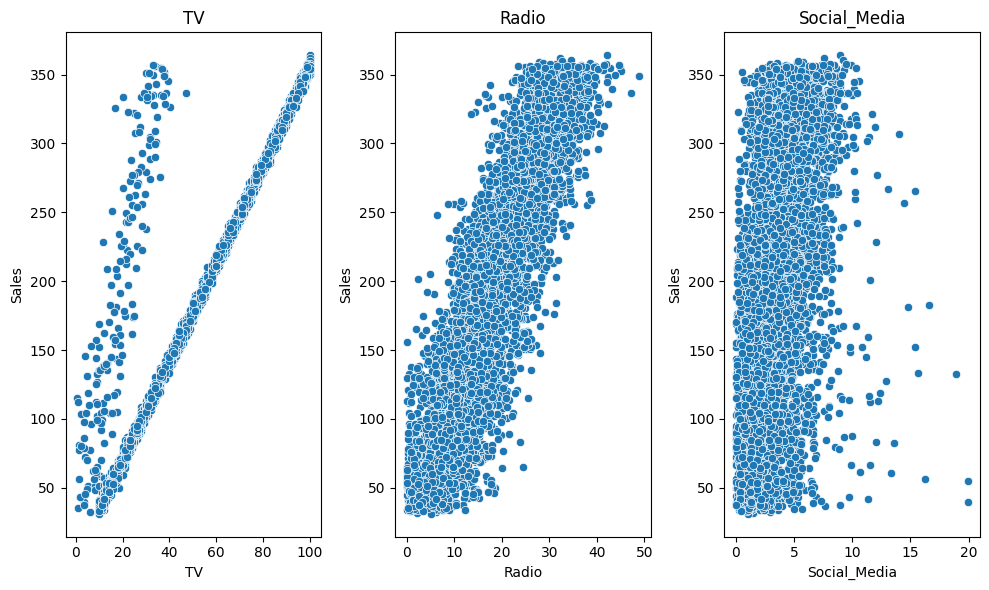

In [ ]:
#cols=['TV', 'Radio', 'Social Media']


for i in cols:
    indices= cols.index(i)

    plt.subplot(1,3,indices+1)
    sns.scatterplot(x=i,y="Sales",data=df_sales)
    plt.title(i)

plt.tight_layout()
plt.show()


### HeatMap for correlation plot

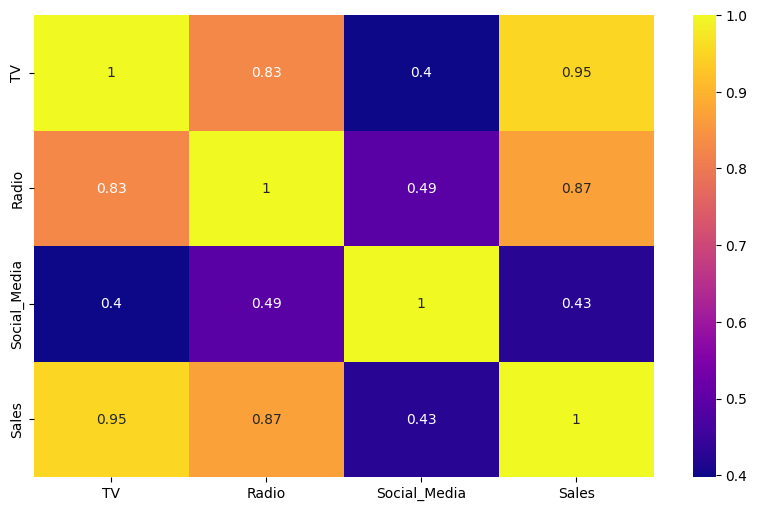

In [ ]:
sns.heatmap(df_sales.corr(),annot=True,cmap='plasma')
plt.show()

**Lets Start with Simple Linear Regression - SLR (We have only one variable)**

### Lets calculate the value of b0 and b1

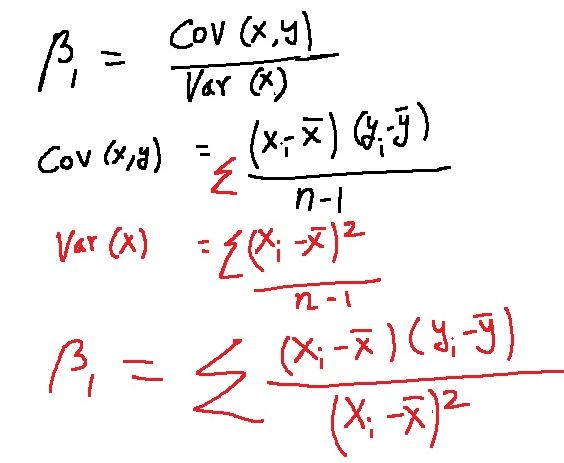

In [ ]:
from IPython.display import Image
Image(filename='b1_formula.jpg',width=400,height=500)

In [ ]:
# mediaRadio = np.array([df_sales['Radio'],df_sales['Sales']])

In [ ]:
# Lets Calculate the Numerator and denominator

In [ ]:
xbar=df_sales['Radio'].mean()
ybar=df_sales['Sales'].mean()


In [ ]:
xbar

18.163548555425997

In [ ]:
numerator =np.sum((df_sales['Radio']-xbar)*(df_sales['Sales']-ybar))
denominator=np.sum(((df_sales['Radio']-xbar)**2))

In [ ]:
beta1=numerator /denominator
print('Slope', beta1)

Slope 8.363524313521589


### b0 formula

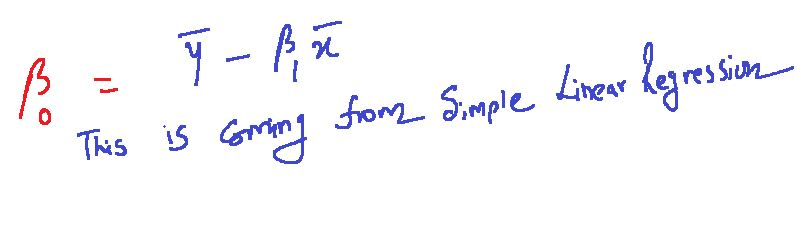

In [ ]:
Image(filename='b0_formula.JPG',width=00,height=200)

In [ ]:
beta0=ybar-beta1*xbar
print("Intercept",beta0)

Intercept 40.54042679515416


In [ ]:
#Equation of the Linear regression line with one variable
#Yhat = b0 + b1 * x1
beta0 + beta1 * df_sales['Radio']

0        95.457258
1       117.800695
2       173.407104
3       291.613663
4       111.106891
           ...    
4549     77.945119
4550    212.918395
4551    206.138813
4552    187.191817
4553    174.078206
Name: Radio, Length: 4554, dtype: float64

1. This is the manual way of calulating the slope and intercept.
2. Below code shows what happens at the backend. We are manually finding the calculated value by using predicted equation.
3. All of the calculations happen by using .fit() and .predict() functions.

In [ ]:
#predicted sales
df_sales['Yhat'] = beta0 + beta1 * df_sales['Radio']
df_sales.head()

,TV,Radio,Social_Media,Sales,Yhat
0,16.0,6.566231,2.907983,54.732757,95.457258
1,13.0,9.237765,2.409567,46.677897,117.800695
2,41.0,15.886446,2.913410,150.177829,173.407104
3,83.0,30.020028,6.922304,298.246340,291.613663
4,15.0,8.437408,1.405998,56.594181,111.106891


## Visualization

[]

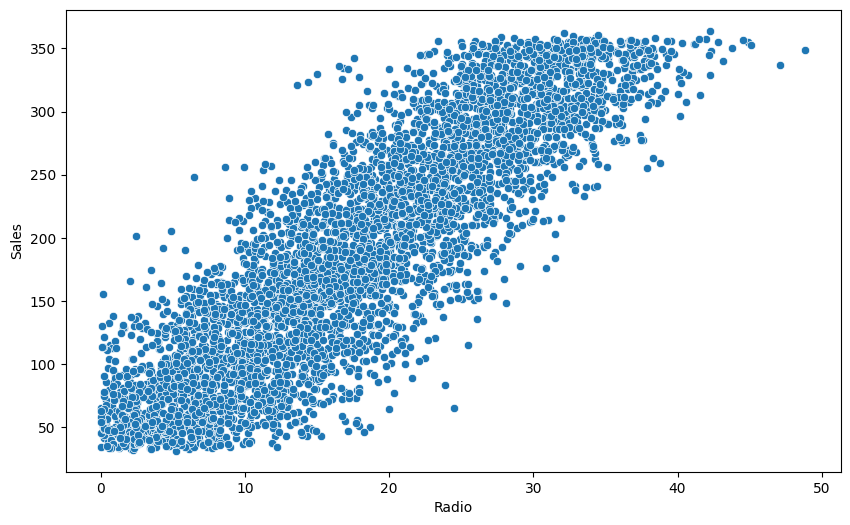

In [ ]:
sns.scatterplot(x=df_sales['Radio'],y=df_sales['Sales'],data=df_sales)
plt.plot()

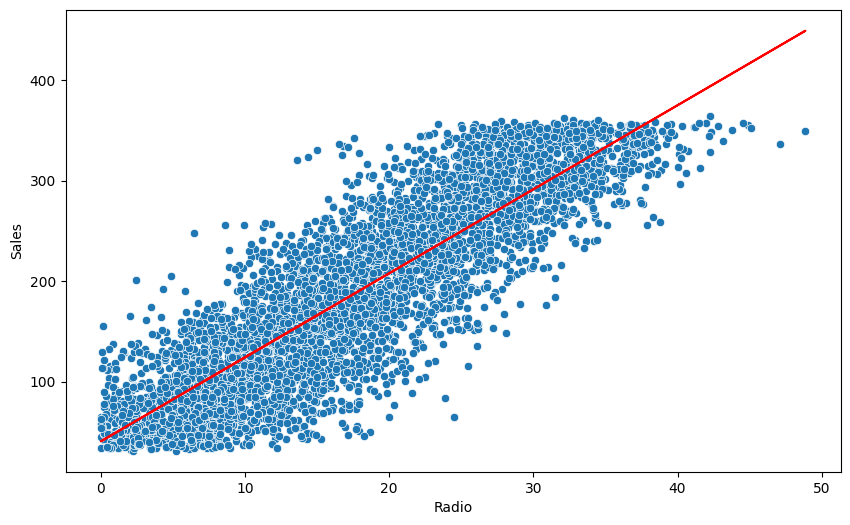

In [ ]:
sns.scatterplot(x=df_sales['Radio'],y=df_sales['Sales'],data=df_sales)
plt.plot(df_sales['Radio'],df_sales['Yhat'],color='red')

1. Visualization is not possible with more than 2 data points or 2 features.
2. With multiple predictors, visualization becomes difficult.
3. Presence of outliers decide the model and shape of the linear regression line.

## Statistical Models

1. .fit() will build the model where the slope and intercept along with other statistical parameters are calculated
2. Y ~ x

In [ ]:
import statsmodels.formula.api as sfa

model_tv =sfa.ols("Sales~TV", data=df_sales).fit()
model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 4.485e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:48:50   Log-Likelihood:                -21678.
No. Observations:                4554   AIC:                         4.336e+04
Df Residuals:                    4552   BIC:                         4.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7037      0.930     17.969      0.000      14.881      18.526
TV             3.3414      0.016    211.775      0.000       3.310       3.372
==============================================================================
Omnibus:                     4944.797   Durbin-Watson:                   0.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264809.024
Skew:                           5.718   Prob(JB):                         0.00
Kurtosis:                      38.564   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The highest correlation was for TV advertisement and hence we get highest r2

In [ ]:
import statsmodels.formula.api as sfa

model_rd =sfa.ols("Sales~Radio", data=df_sales).fit()
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                 1.404e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:48:50   Log-Likelihood:                -23904.
No. Observations:                4554   AIC:                         4.781e+04
Df Residuals:                    4552   BIC:                         4.782e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5404      1.453     27.908      0.000      37.693      43.388
Radio          8.3635      0.071    118.478      0.000       8.225       8.502
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.207
Skew:                          -0.005   Prob(JB):                        0.901
Kurtosis:                       3.031   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.formula.api as sfa

model_sm =sfa.ols("Sales~Social_Media", data=df_sales).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     1005.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          1.93e-199
Time:                        16:48:50   Log-Likelihood:                -26653.
No. Observations:                4554   AIC:                         5.331e+04
Df Residuals:                    4552   BIC:                         5.332e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      130.3631      2.323     56.122      0.000     125.809     134.917
Social_Media    17.2188      0.543     31.699      0.000      16.154      18.284
==============================================================================
Omnibus:                       38.698   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.107
Skew:                          -0.126   Prob(JB):                     1.76e-07
Kurtosis:                       2.683   Cond. No.                         8.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The correlation between the Social Media and Sales is very low. Hence the r2 is also low

In [ ]:
import statsmodels.formula.api as sfa

model_sm =sfa.ols("Sales~TV+Social_Media", data=df_sales).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.313e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:55:45   Log-Likelihood:                -21614.
No. Observations:                4554   AIC:                         4.323e+04
Df Residuals:                    4551   BIC:                         4.325e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.6848      0.982     12.922      0.000      10.760      14.609
TV               3.2643      0.017    192.536      0.000       3.231       3.298
Social_Media     2.2385      0.196     11.434      0.000       1.855       2.622
==============================================================================
Omnibus:                     4813.265   Durbin-Watson:                   0.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239938.524
Skew:                           5.487   Prob(JB):                         0.00
Kurtosis:                      36.824   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.formula.api as sfa

model_2v =sfa.ols("Sales~Social_Media + Radio ", data=df_sales).fit()
model_2v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     7017.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:48:50   Log-Likelihood:                -23904.
No. Observations:                4554   AIC:                         4.781e+04
Df Residuals:                    4551   BIC:                         4.783e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       40.7151      1.538     26.469      0.000      37.699      43.731
Social_Media    -0.1178      0.341     -0.345      0.730      -0.787       0.551
Radio            8.3773      0.081    103.314      0.000       8.218       8.536
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.202
Skew:                          -0.006   Prob(JB):                        0.904
Kurtosis:                       3.031   Cond. No.                         47.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_rd =sfa.ols("Sales~Social_Media+ Radio+TV", data=df_sales).fit()
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.967e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:48:50   Log-Likelihood:                -21103.
No. Observations:                4554   AIC:                         4.221e+04
Df Residuals:                    4550   BIC:                         4.224e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.6478      0.880     12.102      0.000       8.923      12.373
Social_Media     0.2651      0.185      1.436      0.151      -0.097       0.627
Radio            2.4238      0.072     33.802      0.000       2.283       2.564
TV               2.6013      0.025    104.939      0.000       2.553       2.650
==============================================================================
Omnibus:                     3773.858   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101190.542
Skew:                           3.891   Prob(JB):                         0.00
Kurtosis:                      24.742   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As a Investor for launching the product, We will choose TV and Radio advertisements rather than social media advertisement.

## Lets Calculate R2 and Adjusted R2

In [ ]:
df_sales.head()

,TV,Radio,Social_Media,Sales,Yhat
0,16.0,6.566231,2.907983,54.732757,95.457258
1,13.0,9.237765,2.409567,46.677897,117.800695
2,41.0,15.886446,2.913410,150.177829,173.407104
3,83.0,30.020028,6.922304,298.246340,291.613663
4,15.0,8.437408,1.405998,56.594181,111.106891


The error = Y -Yhat ====> Actual -Predicted

In [ ]:
df_sales['error'] =df_sales['Sales']-df_sales['Yhat']
df_sales.head()

,TV,Radio,Social_Media,Sales,Yhat,error
0,16.0,6.566231,2.907983,54.732757,95.457258,-40.724500
1,13.0,9.237765,2.409567,46.677897,117.800695,-71.122798
2,41.0,15.886446,2.913410,150.177829,173.407104,-23.229276
3,83.0,30.020028,6.922304,298.246340,291.613663,6.632677
4,15.0,8.437408,1.405998,56.594181,111.106891,-54.512710


### SSE

*Sum of square error*  = Sum(Actual -Predicted)**2

In [ ]:
SSE = np.sum(df_sales['error']**2)

SST

*Sum of square Total  SST*

In [ ]:
SST =np.sum((df_sales['Sales']-ybar)**2)

### R2 Square

In [ ]:
r2 = (1- SSE/SST)
r2

0.7551252402743278

### finding the value from model

In [ ]:
model_rd.rsquared

0.9284068876296864

### Adjusted R2

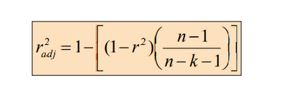

In [ ]:
Image(filename='Adr2.JPG',width=500,height=200)

In [ ]:
import statsmodels.formula.api as sfa

model=sfa.ols("Sales~Social_Media + Radio +TV", data=df_sales).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.967e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:48:50   Log-Likelihood:                -21103.
No. Observations:                4554   AIC:                         4.221e+04
Df Residuals:                    4550   BIC:                         4.224e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.6478      0.880     12.102      0.000       8.923      12.373
Social_Media     0.2651      0.185      1.436      0.151      -0.097       0.627
Radio            2.4238      0.072     33.802      0.000       2.283       2.564
TV               2.6013      0.025    104.939      0.000       2.553       2.650
==============================================================================
Omnibus:                     3773.858   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101190.542
Skew:                           3.891   Prob(JB):                         0.00
Kurtosis:                      24.742   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Moment will add T.V. the Adj R2 increases expoentially. TV is a good predictor. Later will be also look at feature selection methods.Where should you invest money to maximum revenue with budget constraint.

### Understanding the Slope and Intercept

1. **Say I invest $$1 in the marketing, social media is given 26 cents of sales, Radio is giving $2.43 of sales, and TV is giving $2.60 of sales**.

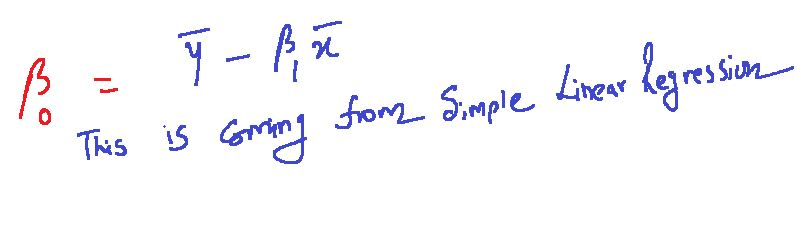

In [ ]:
Image(filename='b0_formula.JPG',width=00,height=200)

**If b1 becomes ZERO and then b0 = Ybar. When the slope =0 then b1=Ybar**

1. The difference between r2 and Adjusted r2 is that the Adj R2 is based on whether the feature is able to add value to the model or not
2. If the newly added feature is not able to add value then such a feature is not valuable to the model and should be discarded.
3. Adj R2 is driven by feature importance whereas when we add new feature r2 will always increase thereby giving a false idea that the model is performing well which ideally can be checked using Adj r2.
4. Adj R2 is dependent on the number of features / predictors involved in building the model
5. Higher the r2 lower the error. Lower the r2, Higher the Error.
6. Adj R2 can never go above R2. It is either = r2 or less than r2.

### Calculate Adj r2

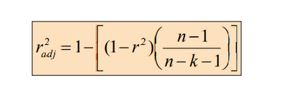

In [ ]:
Image(filename='Adr2.JPG',width=500,height=200)

In [ ]:
# 1- [(1-model.rsquared)  * ((df_sales.shape[0]-1) / (df_sales.shape[0]-1-3))]

In [ ]:
print("rsquared", model.rsquared)
print("rows", df_sales.shape[0])

rsquared 0.9284068876296864
rows 4554


## FSTATISTICS

In [ ]:
df_mpg=sns.load_dataset('mpg')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df_mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

1. Weather the mpg is the same for all the vehicles originating from different coiuntres.
2. There are 3 countries of origin.
3. When we have 2 categories, we apply t Test. If more than 2 then Apply ANOVA.
4. H0: Origin has no effect on the MPG. Ha: Origin has impact on the MPG

In [ ]:
# category and category then Apply Chi Sq test
# Ho : The species type is independent of the island where it is found. The island location does not impact on type of species.
# Ha : The species type is dependent on the island where it is found. The island location does have impact on type of species.



In [ ]:
df_peg=sns.load_dataset('penguins')
df_peg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Lets formulate the Null and Alternate Hypothesis

In [ ]:
# Null Hypothesis
# H0: Radio Advertisements has no impact on the sales - No effect
# Ha: Radio Advertisements has impact on the sales
# Apply 2 sample independent t test

# category and number then Apply ANOVA


### Features in the Advertisement Models

1. Lets Apply t Test statics on the type of channels of Advertisement and see if they have an impact on the sales.
2.If they have an impact, then we will include them in the model.

In [ ]:
# Radio advertisements have impact on the sales.
# If they have impact then we are going to include them else they will not be included in the model building.

In [ ]:
# H0: Radio Advertisements have no impact on the sales - No effect
# Ha: Radio Advertisements have impact on the sales
# outcome- If p value is less than 0.05- reject the null hypothesis else fail to reject the null hypothesis

In [ ]:
stats.ttest_ind(df_sales['Radio'],df_sales['Sales'])

Ttest_indResult(statistic=-125.66490123267837, pvalue=0.0)

***Conclusion***

This type of statistical test are done to validate the features. If these features are important for model building.

1. We reject the null hypothesis.
2. Radio advertisements have impact on the sales.
3. The probability is 0.0 that the null is correct. Hence that means the probability of alternate hypothesis is very high. Hence the alternate hypothesis is accepted.
4. p Value is the probability of null hypothesis being correct.

**Fstatistics tells whether the Model is significant.**

In [ ]:
# H0: Model is insignificant.  The Model with no independent variable fits the data very well. Intercept model is good enough
# Ha: Model is Significant. The model fits the data better than the intercept model.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.967e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:48:50   Log-Likelihood:                -21103.
No. Observations:                4554   AIC:                         4.221e+04
Df Residuals:                    4550   BIC:                         4.224e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.6478      0.880     12.102      0.000       8.923      12.373
Social_Media     0.2651      0.185      1.436      0.151      -0.097       0.627
Radio            2.4238      0.072     33.802      0.000       2.283       2.564
TV               2.6013      0.025    104.939      0.000       2.553       2.650
==============================================================================
Omnibus:                     3773.858   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101190.542
Skew:                           3.891   Prob(JB):                         0.00
Kurtosis:                      24.742   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Fstatistics is less than 0.05. We reject and conclude that this is a good model.

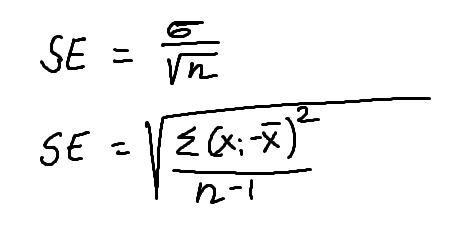

In [ ]:
Image(filename='SE.JPG',width=500,height=200)

From the statistics of the Model
1. The coefficients of Radio Advertisements and TV are high compared to Social Media which means that Impact of Social Media is very low.
2. Standard error for TV advertisement is the lowest followed by Radio, however the standard error for Social Media is very high.

**Building the model without the Social Media Variable**

In [ ]:
model=sfa.ols("Sales~Radio +TV", data=df_sales).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.949e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:48:51   Log-Likelihood:                -21105.
No. Observations:                4554   AIC:                         4.222e+04
Df Residuals:                    4551   BIC:                         4.223e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0487      0.834     13.240      0.000       9.413      12.685
Radio          2.4563      0.068     36.108      0.000       2.323       2.590
TV             2.6006      0.025    104.919      0.000       2.552       2.649
==============================================================================
Omnibus:                     3773.552   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101089.158
Skew:                           3.891   Prob(JB):                         0.00
Kurtosis:                      24.730   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# from statsmodels.stats import shapiro
# data
# shapiro(data)

Stats.shapiro()
Stats.Jarque_bera()

1. Here the data is residuals. Residuals are not following Normal distribution.
2. Most of the times, Sales data are skewed.
3. Leptokurtic distribution.
4. Durbin Watson is called as Auto correlation of errors. The error in 1st row should not be related with error in 2nd row. Errors should be independent of each other.
5. The error in the first row should not be influencing the error in the second row.
6. The number for Durbin watson test is not the probability. Its range is from 0 to 4.
7. The value for DB Test should be between 1.5 to 2.5.If the value of DB is between 1.5 to 2.5 then there is no Auto correlation.
8. If the value is less than 1.5 or greater than 2.5 then it is highly correlated.

----------------------------------------------
Assumptions of Linear Regression
----------------------------------------------
	The assumptions need to be met.
	1. Normality Test for residuals - JARQUE BERA TEST
	2. Auto correlation Test for residuals : Durbin Watson Test. Range is from 0 to 4. Tolerance range is from 1.5 to 2.5
	3. X and Y should be linearly related with eachother.  -RAINBOW TEST
	4. Multicollinearity: Variables should be independent of each other- There should not be highly correlated.- Test : Correlation , Condition No:
	5. Heteroscedasticity : The data has unequal variance. Residuals have unequal variance. statistical test : Breusch Pagan Test